# Homework03:  Topic Modeling with Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a method for finding latent similarities between documents treated as a bag of words by using a low rank approximation. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA. SVD is also used in recommender systems in an similar fashion (for an SVD-based recommender system library, see [Surpise](http://surpriselib.com). 

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statistical language analysis, the most efficient Python libraries are probably [gensim](https://radimrehurek.com/gensim/) and [spaCy](https://spacy.io) - these also provide an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Language Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```

**Exercise 1 (20 points)**.  Calculating pairwise distance matrices.

Suppose we want to construct a distance matrix between the rows of a matrix. For example, given the matrix 

```python
M = np.array([[1,2,3],[4,5,6]])
```

the distance matrix using Euclidean distance as the measure would be
```python
[[ 0.000  1.414  2.828]
 [ 1.414  0.000  1.414]
 [ 2.828  1.414  0.000]] 
```
if $M$ was a collection of column vectors.

Write a function to calculate the pairwise-distance matrix given the matrix $M$ and some arbitrary distance function. Your functions should have the following signature:
```
def func_name(M, distance_func):
    pass
```

0. Write a distance function for the Euclidean, squared Euclidean and cosine measures.
1. Write the function using looping for M as a collection of row vectors.
2. Write the function using looping for M as a collection of column vectors.
3. Wrtie the function using broadcasting for M as a collection of row vectors.
4. Write the function using broadcasting for M as a collection of column vectors. 

For 3 and 4, try to avoid using transposition (but if you get stuck, there will be no penalty for using transposition). Check that all four functions give the same result when applied to the given matrix $M$.

In [1]:
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix
import numpy as np
import scipy.linalg as la

In [2]:
M = np.array([[1,2,3],[4,5,6]])

In [4]:
#define dist measure function
def Square_Euclidean(u,axis=-1): # Square Euclidean distance 
    return (u**2).sum(axis)
def Euclidean(u,axis=-1):
    return np.sqrt(Square_Euclidean(u,axis))
def Square_Euclidean_dist(u,v,axis=-1):
    return(Square_Euclidean(u-v,axis))
def Euclidean_dist(u,v,axis=-1):
    return(Euclidean(u-v,axis))
def cosine_dist(v,u,axis=-1):
    return 1-(v*u).sum(axis)/(Euclidean(v,axis)*Euclidean(u,axis))

In [5]:
def loop_raw(M,dist):
    return np.array([[dist(M[u,:],M[v,:]) for u in range(M.shape[0])] for v in range(M.shape[0])]).round(3)
def loop_col(M,dist):
    return np.array([[dist(M[:,u],M[:,v]) for u in range(M.shape[1])] for v in range(M.shape[1])]).round(3)
def bc_raw(M,dist):
    return np.array(dist(M[:,None,:],M)).round(3)
def bc_col(M,dist):
    return np.array(dist(M[:,:,None],M[:,None,:],axis=0)).round(3)

In [7]:
# test func
for name,dist in zip(np.array(['Euclidean_dist','Square_Euclidean_dist','cosine_dist']),np.array([Euclidean_dist,Square_Euclidean_dist,cosine_dist])):
    print('*'*15+' Distant Measure: {} '.format(name)+'*'*15)
    print('-'*20+'By row vector'+'-'*20)
    print('Loop func:')
    print(loop_raw(M,dist))
    print('Broadcasting func:')
    print(bc_raw(M,dist))
    print('-'*20+'By column vector'+'-'*20)
    print('Loop func:')
    print(loop_col(M,dist))
    print('Broadcasting func:')
    print(bc_col(M,dist))

*************** Distant Measure: Euclidean_dist ***************
--------------------By row vector--------------------
Loop func:
[[0.    5.196]
 [5.196 0.   ]]
Broadcasting func:
[[0.    5.196]
 [5.196 0.   ]]
--------------------By column vector--------------------
Loop func:
[[0.    1.414 2.828]
 [1.414 0.    1.414]
 [2.828 1.414 0.   ]]
Broadcasting func:
[[0.    1.414 2.828]
 [1.414 0.    1.414]
 [2.828 1.414 0.   ]]
*************** Distant Measure: Square_Euclidean_dist ***************
--------------------By row vector--------------------
Loop func:
[[ 0 27]
 [27  0]]
Broadcasting func:
[[ 0 27]
 [27  0]]
--------------------By column vector--------------------
Loop func:
[[0 2 8]
 [2 0 2]
 [8 2 0]]
Broadcasting func:
[[0 2 8]
 [2 0 2]
 [8 2 0]]
*************** Distant Measure: cosine_dist ***************
--------------------By row vector--------------------
Loop func:
[[0.    0.025]
 [0.025 0.   ]]
Broadcasting func:
[[0.    0.025]
 [0.025 0.   ]]
--------------------By column ve

**Exercise 2 (20 points)**. 

**Exercise 2 (20 points)**. Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=document text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the document text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

In [8]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

In [9]:
import string
import pandas as pd
from collections import Counter

In [10]:
def tf(doc):
    from collections import Counter
    import string
    words=doc.lower().replace('-',' ').translate(str.maketrans('','',string.punctuation)).split()
    return Counter(words)
def tfs(docs):
    import pandas as pd
    return pd.DataFrame({doc:tf(words) for doc,words in docs.items()}).fillna(0)
def idf(docs):
    return np.log(len(docs)/(1+np.count_nonzero(tfs(docs),axis=1)))
def tf_idf(docs):
    tf_idf=tfs(docs).multiply(idf(docs),axis=0)
    tf_idf.columns=tf_idf.columns+'(tf-idf)'
    return tf_idf

In [11]:
tf_idf(docs).sort_index().round(4)

,s1(tf-idf),s2(tf-idf),s3(tf-idf),s4(tf-idf)
brown,0.2877,0.2877,0.0000,0.0000
dog,0.0000,0.0000,0.2877,0.2877
elephant,0.0000,0.0000,0.2877,0.2877
fox,0.2877,0.2877,0.0000,0.0000
jumps,0.0000,2.7726,0.0000,0.0000
lazy,0.0000,0.0000,0.6931,0.0000
lion,0.0000,0.0000,0.0000,0.6931
over,0.0000,0.6931,0.0000,0.0000
peacock,0.0000,0.0000,0.0000,0.6931
quick,0.6931,0.0000,0.0000,0.0000


**Exercise 3 (20 points)**. 

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [12]:
M = np.array([
    [1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [13]:
#1
#function that takes a matrix  MM  and an integer  kk  as arguments
#reconstructs a reduced matrix using only the  kk  largest singular values
def reduce(M,k):
    U,D,Vt=la.svd(M)
    index=D.argsort()[::-1][:k]
    reduM=U[:,:k]@np.diag(D[:k])@Vt[:k,:]
    return reduM

In [65]:
#2
k=2
M1=reduce(M,k)
M1
#space=U.shape[0]*k+k+Vt.shape[1]*k
#space/np.prod(M.shape)

array([[ 0.16205797,  0.40049828,  0.37895454,  0.46756626,  0.17595367,
        -0.05265495, -0.11514284, -0.15910198, -0.09183827],
       [ 0.14058529,  0.36980077,  0.32899603,  0.40042722,  0.16497247,
        -0.03281545, -0.07056857, -0.09676827, -0.04298073],
       [ 0.15244948,  0.50500444,  0.35793658,  0.41010678,  0.23623173,
         0.02421652,  0.05978051,  0.0868573 ,  0.12396632],
       [ 0.25804933,  0.84112343,  0.60571995,  0.69735717,  0.39231795,
         0.03311801,  0.08324491,  0.12177239,  0.18737973],
       [ 0.44878975,  1.23436483,  1.0508615 ,  1.26579559,  0.55633139,
        -0.07378998, -0.15469383, -0.20959816, -0.04887954],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.21846278,  0.54958058,  0.51096047,  0.62805802,  0

In [66]:
#3
from scipy import stats
corr,pv=stats.spearmanr(M)
corr1,pv1=stats.spearmanr(M1)

In [67]:
#use M matrix
G1_corr=corr[:5,:5][np.tril_indices(5,-1)].mean()#delete diagnal
G2_corr=corr[5:,5:][np.tril_indices(4,-1)].mean()#delete diagnal
G1G2_corr=corr[5:,:5].mean()
G1_corr,G2_corr,G1G2_corr

(0.010577686629862826, 0.43511771481980627, -0.30756218890559084)

In [78]:
#use M1 matrix
G1_corr1=corr1[:5,:5][np.tril_indices(5,-1)].mean()#delete diagnal
G2_corr1=corr1[5:,5:][np.tril_indices(4,-1)].mean()#delete diagnal
G1G2_corr1=corr1[5:,:5].mean()
G1_corr1,G2_corr1,G1G2_corr1

(0.8650795342544025, 0.9895104895104896, -0.6772813081926677)

**Exercise 4 (40 points)**. Clustering with LSA

1. Begin by loading a PubMed database of selected article titles using 'pickle'. With the following:
```import pickle
docs = pickle.load(open('data/pubmed.pic', 'rb'))```

    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `data/mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

In [18]:
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt
import scipy.spatial.distance

In [19]:
import pickle
docs = pickle.load(open('../data/pubmed.pic', 'rb'))# import doc from parent directory

In [20]:
#1
df=tf_idf(docs).sort_index()

In [21]:
#2
k=10
U,D,Vt=sparsesvd(csc_matrix(df), k)
print(U.shape,D.shape,Vt.shape)
df_10=U.T@np.diag(D)@Vt
df_10

(10, 6488) (10,) (10, 178)


array([[ 0.22495217,  0.14500945,  0.06946261, ..., -0.25068095,
         0.05141183,  0.05930126],
       [-0.00829858,  0.02741735,  0.01386162, ...,  0.08301818,
         0.01381179,  0.00536497],
       [ 3.41992217,  0.00743581,  0.00522463, ..., -0.19249323,
         0.01347566,  0.0352954 ],
       ...,
       [-0.01043267,  0.01885532,  0.01635062, ...,  0.00764727,
         0.0050345 ,  0.0089896 ],
       [-0.09718582,  0.10880116,  0.08120122, ...,  0.16215132,
         0.042117  ,  0.03965442],
       [-0.00697456,  0.02502567,  0.01927156, ...,  0.01765887,
         0.00757101,  0.01018404]])

In [22]:
#3
k=100
U,D,Vt=sparsesvd(csc_matrix(df), k)
doc_100=np.diag(D)@Vt#doc space with size k*n  k: #space dim; n:#observation
doc_100.shape

(100, 178)

In [23]:
#Xndarray:An m by n array of m original observations in an n-dimensional space.  input size: 178*100
Y = scipy.spatial.distance.pdist(doc_100.T,metric='cosine') 

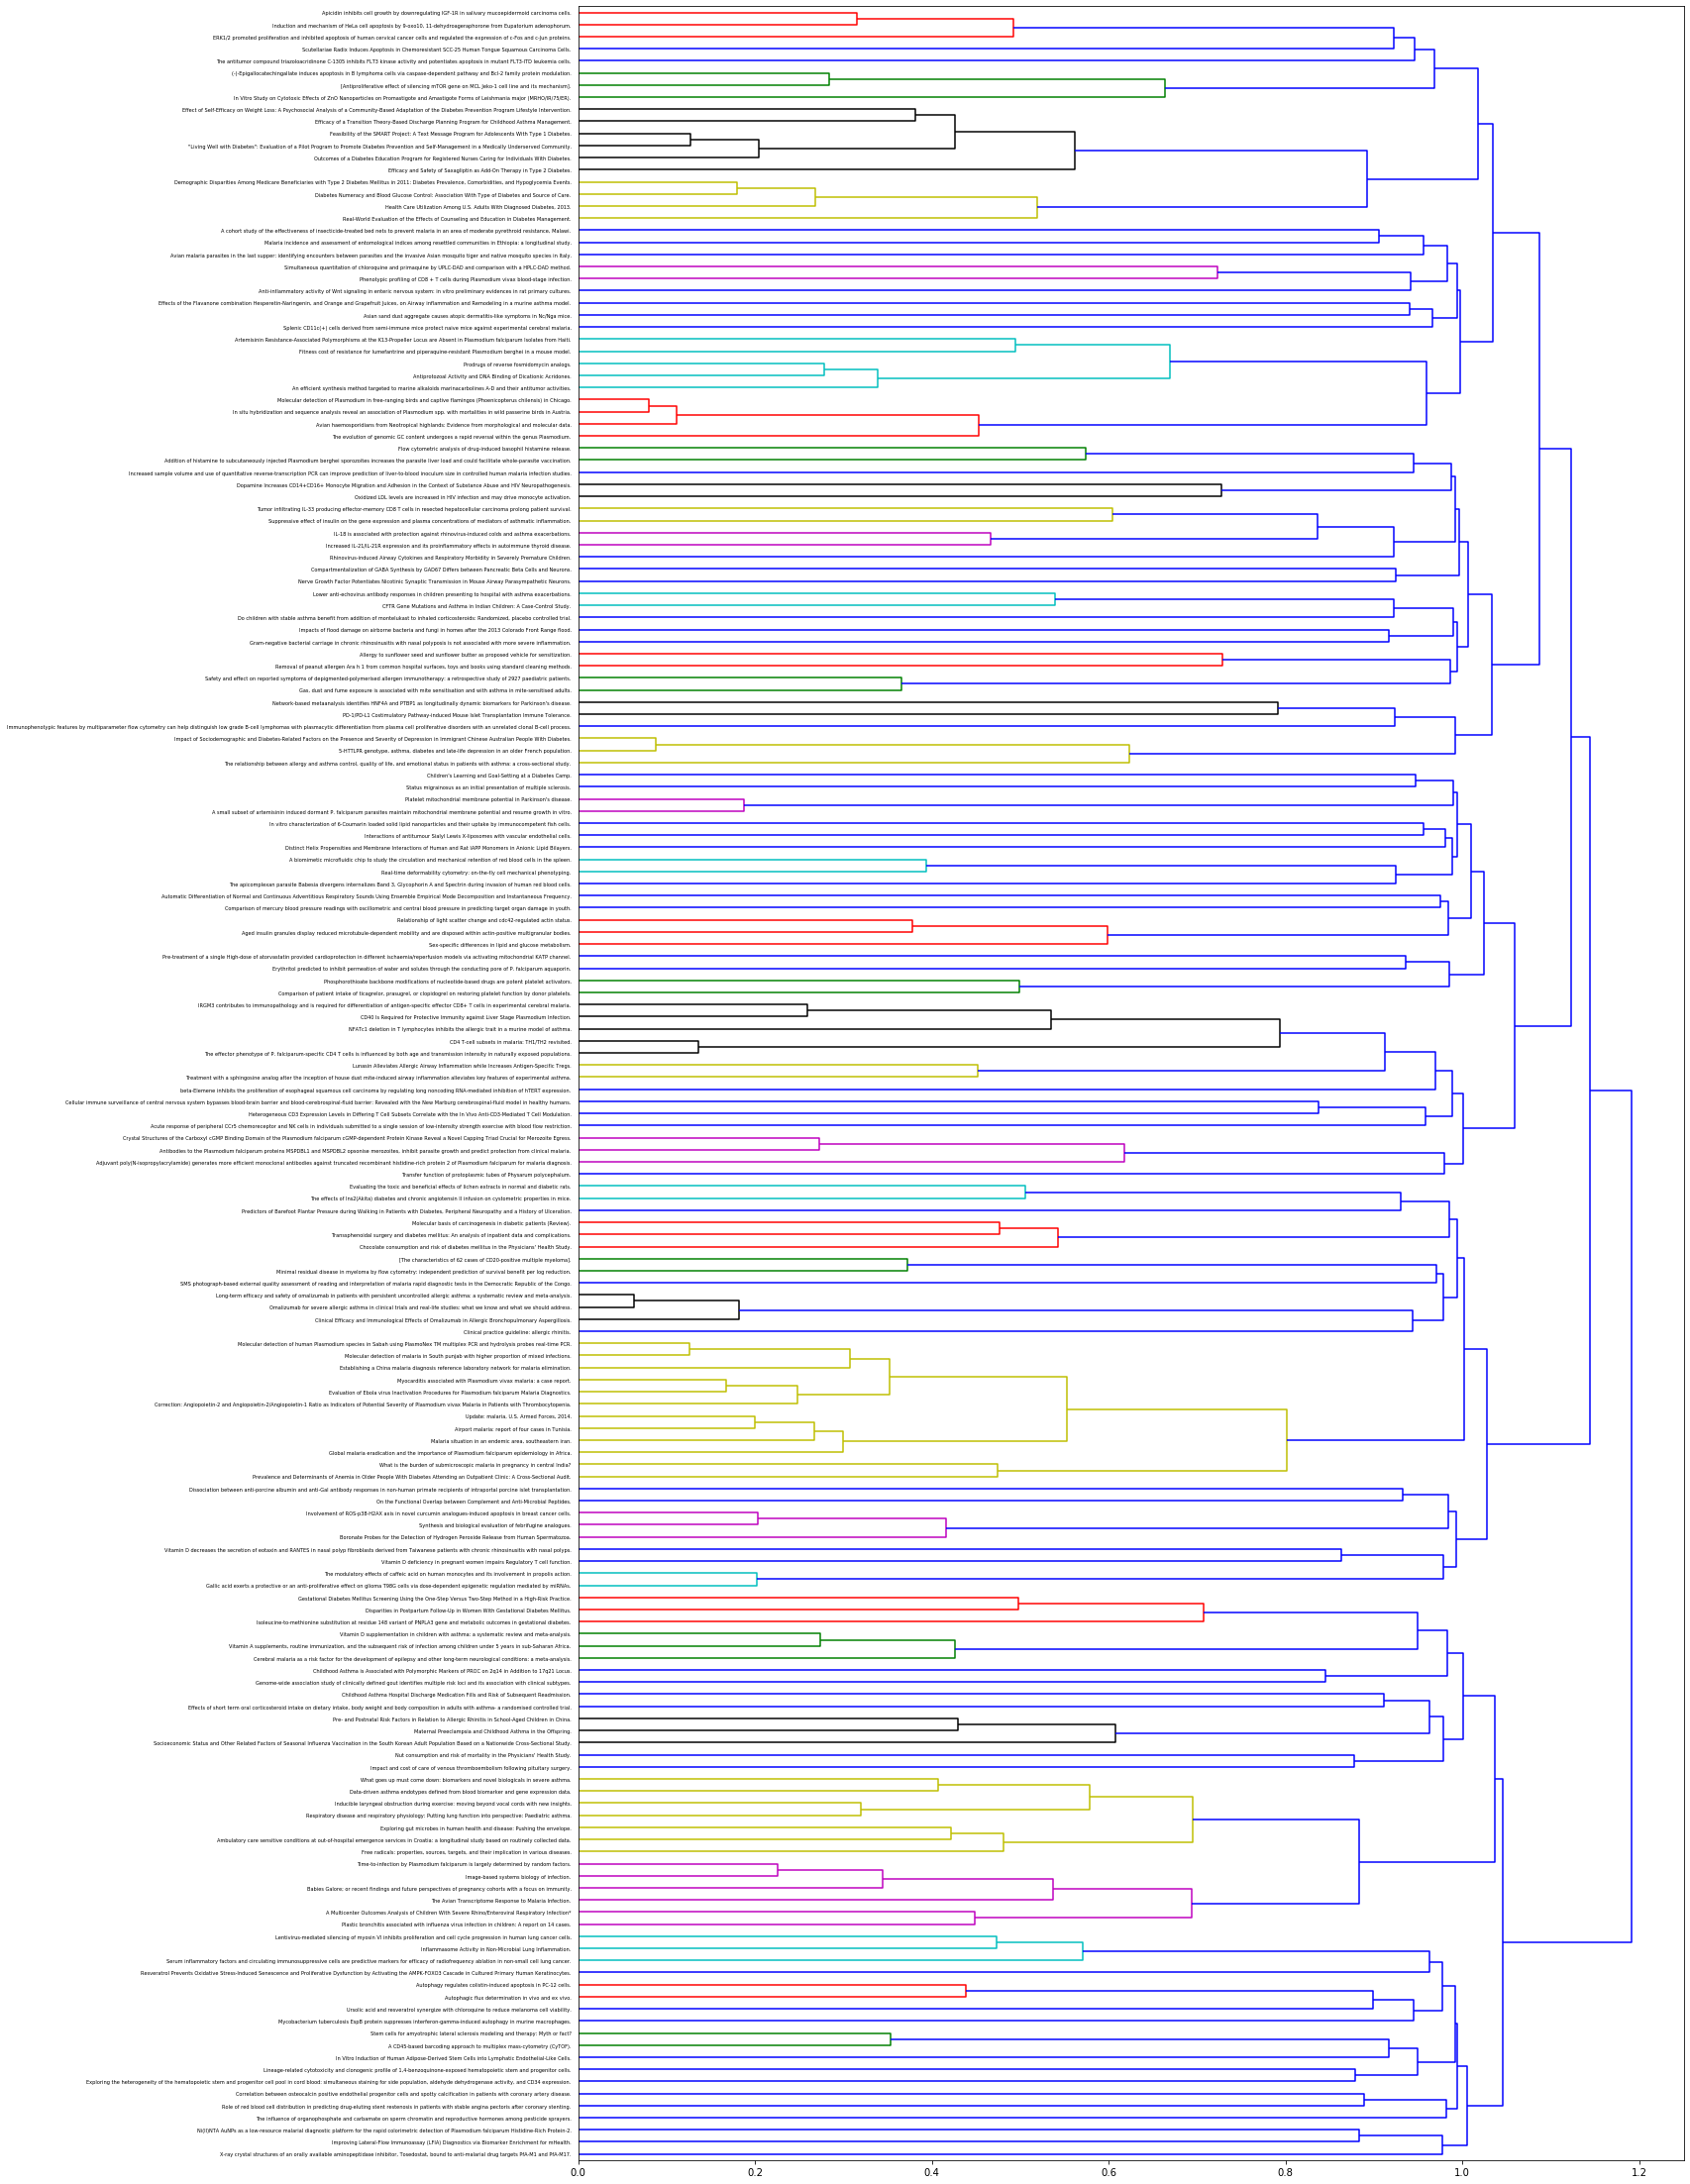

The likely number of clustering is 7


<Figure size 432x288 with 0 Axes>

In [24]:
# linkage func
# use complete method
Z=scipy.cluster.hierarchy.linkage(Y,method='complete') # computing the linkage
fig, ax = plt.subplots(figsize=(20, 40)) # set size
ax = scipy.cluster.hierarchy.dendrogram(Z, orientation="right", labels = [c[:-8] for c in df.columns[:]]);
plt.show()
pass
plt.savefig('complete_clusters.png', dpi=100) #save figure as ward_clusters
pass
# likely number of clutering
print('The likely number of clustering is {}'.format(len(set(ax['color_list']))))

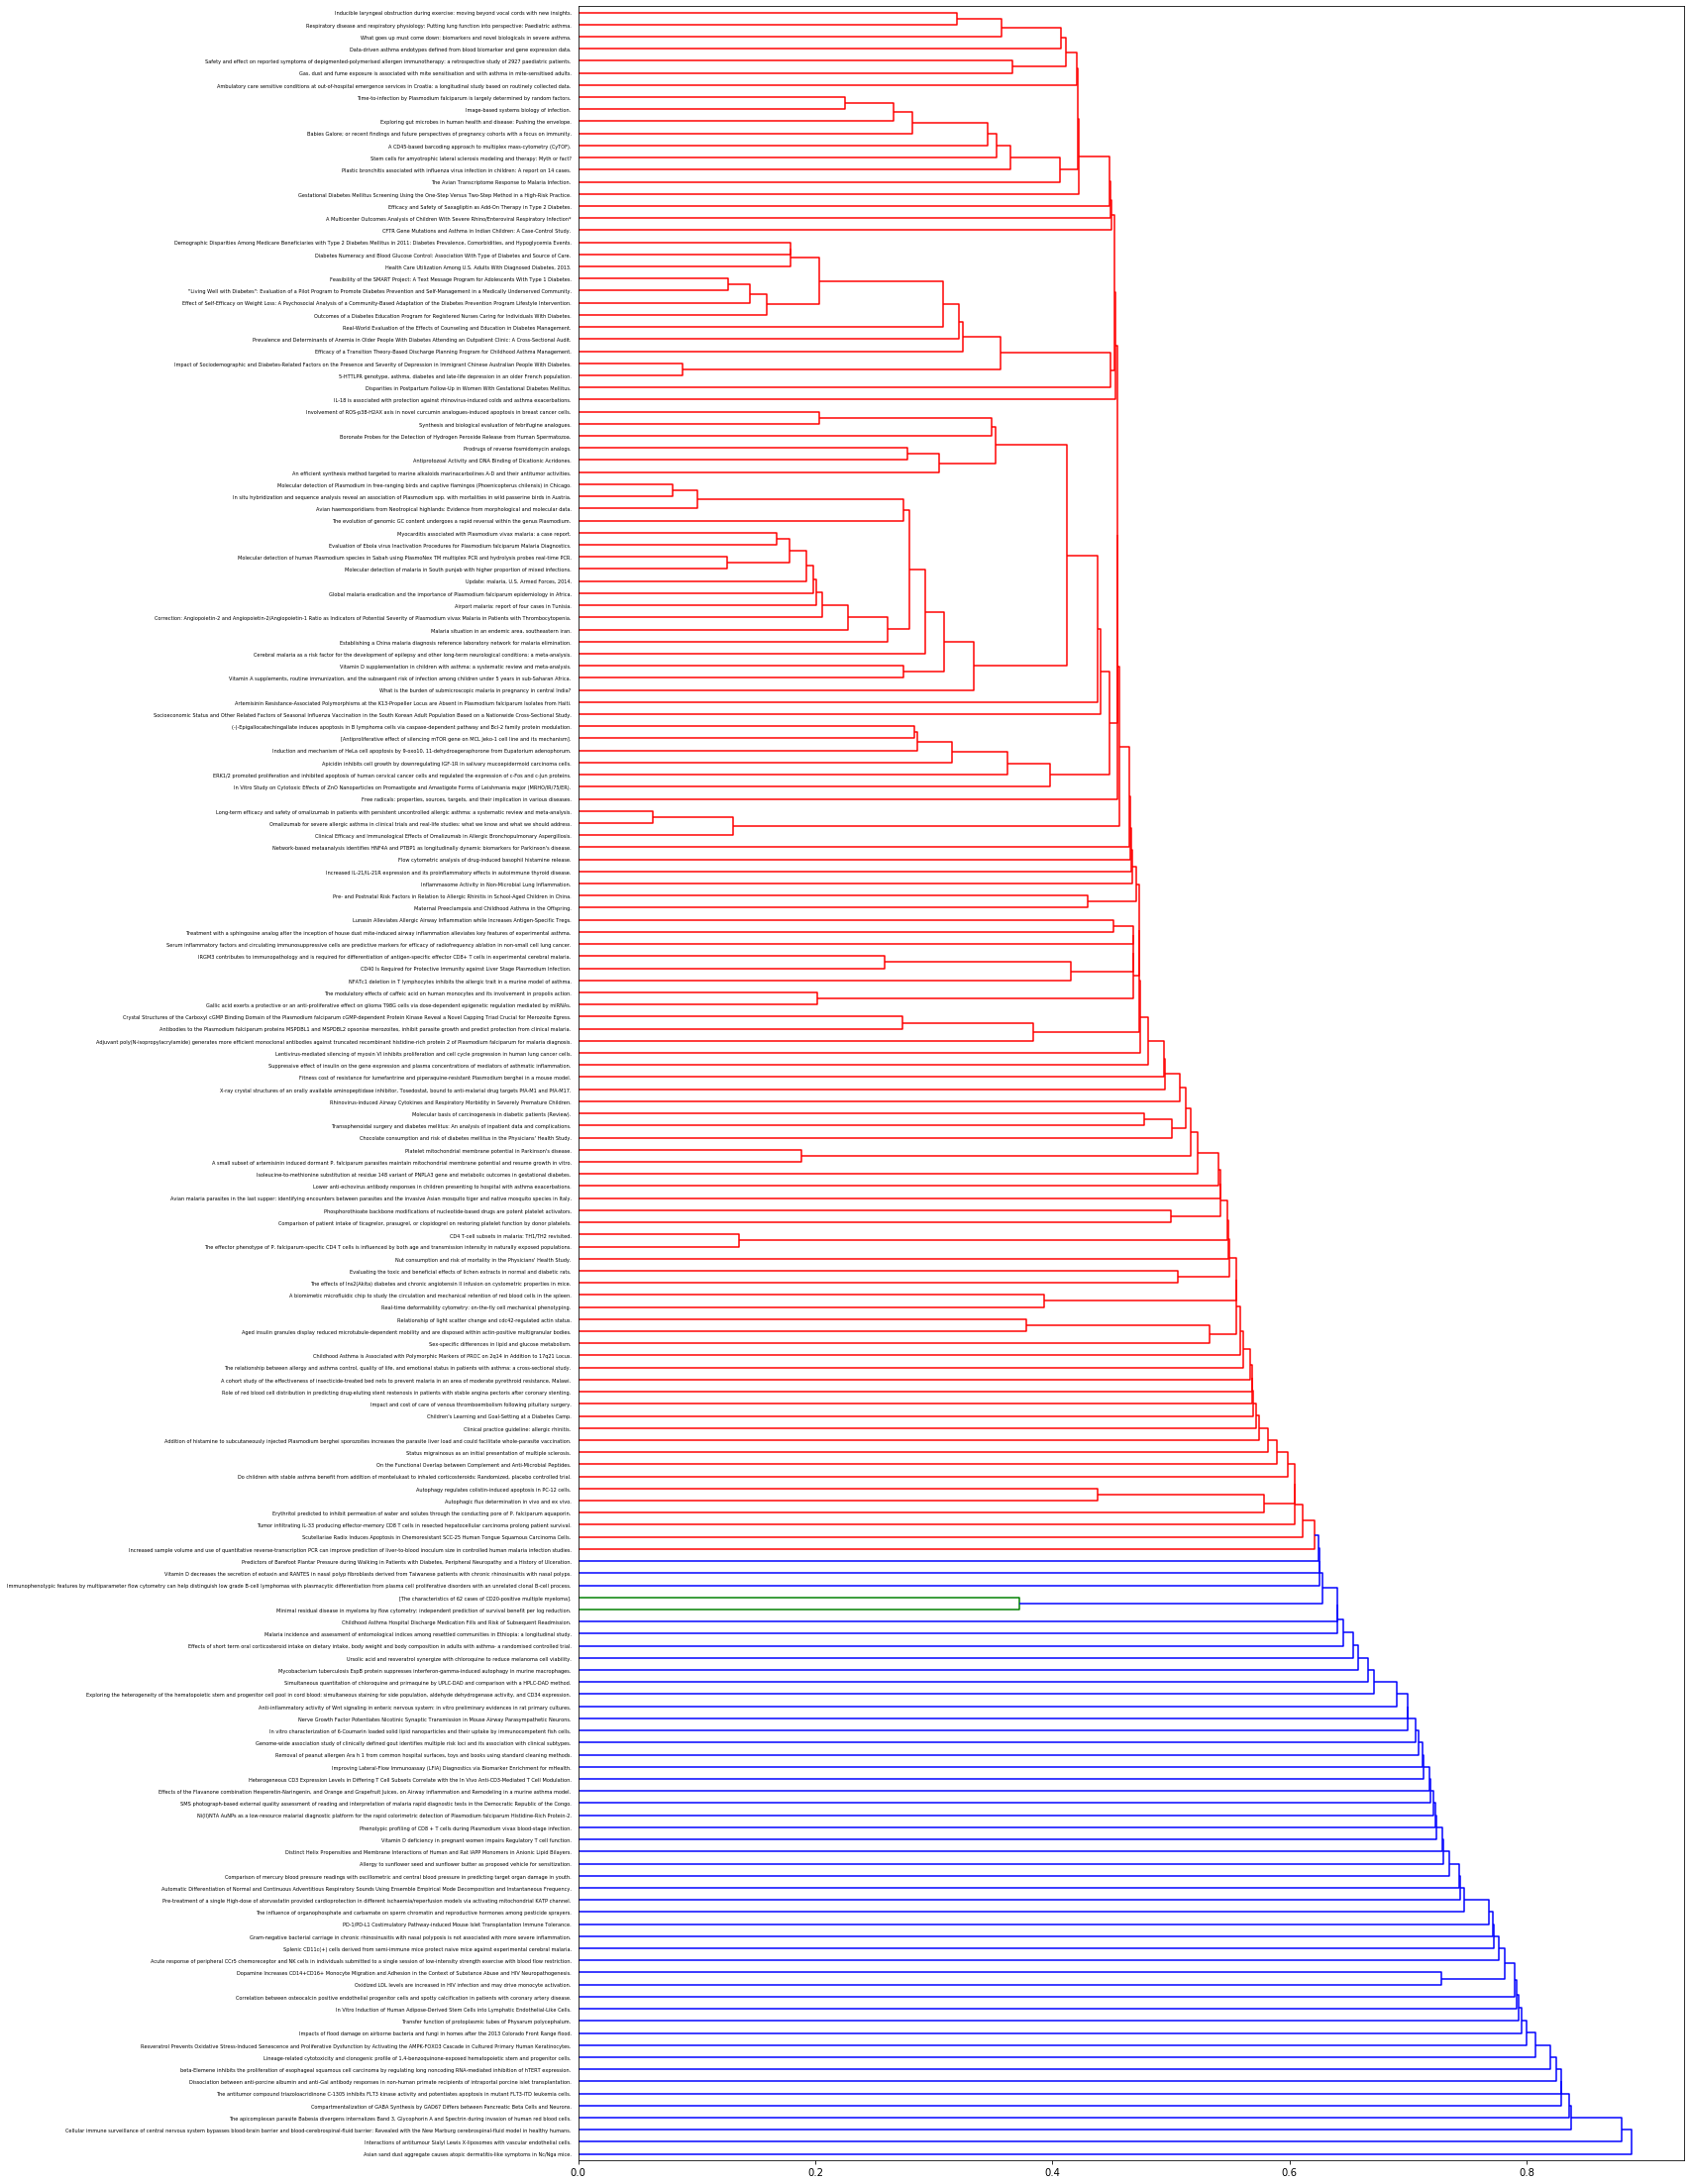

The likely number of clustering is 3


<Figure size 432x288 with 0 Axes>

In [25]:
# linkage func
# use default method
Z=scipy.cluster.hierarchy.linkage(Y) # computing the linkage
fig, ax = plt.subplots(figsize=(20, 40)) # set size
ax = scipy.cluster.hierarchy.dendrogram(Z, orientation="right", labels = [c[:-8] for c in df.columns[:]]);
plt.show()
pass
plt.savefig('defualt_clusters.png', dpi=100) #save figure as ward_clusters
pass
# likely number of clutering
print('The likely number of clustering is {}'.format(len(set(ax['color_list']))))

In [26]:
#4
new = {'mystery': open('../data/mystery.txt').read()}

In [27]:
tf_idfn=tf_idf(new)
v=df.join(tf_idfn).fillna(0).iloc[:,-1][:,None]
q=v.T@U.T@np.diag(1/D)
v.shape, q.shape

((6488, 1), (1, 100))

In [28]:
sim=cosine_dist(q,doc_100.T,axis=1)# the smaller, the similar
sim.shape

(178,)

In [48]:
#most similar
similar=df.columns[sim.argsort()[:10]]# pick the smallest cosine distant
print('-'*30+'The most similar document'+'-'*30)
for i,title in enumerate(similar):
    print('{}: {}'.format(i+1,title))
print('')
print('-'*30+'The most dissimilar document'+'-'*30)    
dissim=df.columns[sim.argsort()[-10:][::-1]]
for i,title in enumerate(dissim):
    print('{}: {}'.format(i+1,title))

------------------------------The most similar document------------------------------
1: IRGM3 contributes to immunopathology and is required for differentiation of antigen-specific effector CD8+ T cells in experimental cerebral malaria.(tf-idf)
2: CD40 Is Required for Protective Immunity against Liver Stage Plasmodium Infection.(tf-idf)
3: CD4 T-cell subsets in malaria: TH1/TH2 revisited.(tf-idf)
4: Antibodies to the Plasmodium falciparum proteins MSPDBL1 and MSPDBL2 opsonise merozoites, inhibit parasite growth and predict protection from clinical malaria.(tf-idf)
5: Crystal Structures of the Carboxyl cGMP Binding Domain of the Plasmodium falciparum cGMP-dependent Protein Kinase Reveal a Novel Capping Triad Crucial for Merozoite Egress.(tf-idf)
6: Dopamine Increases CD14+CD16+ Monocyte Migration and Adhesion in the Context of Substance Abuse and HIV Neuropathogenesis.(tf-idf)
7: Nerve Growth Factor Potentiates Nicotinic Synaptic Transmission in Mouse Airway Parasympathetic Neurons.(tf

**Notes on the Pubmed articles**

These were downloaded with the following script.

```python
from Bio import Entrez, Medline
Entrez.email = "YOUR EMAIL HERE"
import cPickle

try:
    docs = cPickle.load(open('pubmed.pic'))
except Exception, e:
    print e

    docs = {}
    for term in ['plasmodium', 'diabetes', 'asthma', 'cytometry']:
        handle = Entrez.esearch(db="pubmed", term=term, retmax=50)
        result = Entrez.read(handle)
        handle.close()
        idlist = result["IdList"]
        handle2 = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
        result2 = Medline.parse(handle2)
        for record in result2:
            title = record.get("TI", None)
            abstract = record.get("AB", None)
            if title is None or abstract is None:
                continue
            docs[title] = '\n'.join([title, abstract])
            print title
        handle2.close()
    cPickle.dump(docs, open('pubmed.pic', 'w'))
docs.values()
```